# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices (in each dimension) are aligned to minimize the smoothing of the structures recognized by the Optical Flow (OF) estimator.

## Installing the required packages

In [1]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Download a (small) stack
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [2]:
FILEID="1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
FILENAME="stack.mrc"
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O {FILENAME}

--2022-12-08 05:46:23--  https://docs.google.com/uc?export=download&id=1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving docs.google.com (docs.google.com)... 2a00:1450:4003:80c::200e, 142.250.184.174
Connecting to docs.google.com (docs.google.com)|2a00:1450:4003:80c::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gt2gl4ur3m413j9ksdm2grjabv9ldt3g/1670474775000/01084993768099894447/*/1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB?e=download&uuid=cf79726f-4058-4558-a78d-6af92713c627 [following]
--2022-12-08 05:46:26--  https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gt2gl4ur3m413j9ksdm2grjabv9ldt3g/1670474775000/01084993768099894447/*/1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB?e=download&uuid=cf79726f-4058-4558-a78d-6af92713c627
Resolving doc-0s-8s-docs.googleusercontent.com (doc-0s-8

## Filtering (using default parameters)

### The default parameters are:

In [3]:
!python ../flowdenoising.py -h

usage: flowdenoising.py [-h] [-t TRANSPOSE [TRANSPOSE ...]] [-i INPUT]
                        [-o OUTPUT] [-s SIGMA [SIGMA ...]] [-l LEVELS]
                        [-w WINSIDE] [-v VERBOSITY] [-n]

3D Gaussian filtering controlled by the optical flow.

options:
  -h, --help            show this help message and exit
  -t TRANSPOSE [TRANSPOSE ...], --transpose TRANSPOSE [TRANSPOSE ...]
                        Transpose pattern (by default the 3D volume in not
                        transposed) (default: (0, 1, 2))
  -i INPUT, --input INPUT
                        Input a MRC-file or a multi-image TIFF-file (default:
                        ./stack.mrc)
  -o OUTPUT, --output OUTPUT
                        Output a MRC-file or a multi-image TIFF-file (default:
                        ./denoised_stack.mrc)
  -s SIGMA [SIGMA ...], --sigma SIGMA [SIGMA ...]
                        Gaussian sigma for each dimension in the order (Z, Y,
                        X) (default: (2.0, 2.0, 2.0))
 

### Filtering

In [4]:
!python ../flowdenoising.py

In [5]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz   8394398 dic  8 05:46 denoised_stack.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 dic  7 22:45 no_OF_filtered_larger_stack.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 dic  8 05:46 stack.mrc


## Filtering (using TIFF output)

In [6]:
!python ../flowdenoising.py -o filtered_stack.tif

In [7]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 8394398 dic  8 05:47 filtered_stack.tif
-rw-r--r-- 1 vruiz vruiz 8394398 dic  7 22:20 no_OF_filtered_stack.tif


## Filtering (without OF compensation)

In [8]:
!python ../flowdenoising.py --no_OF -o no_OF_filtered_stack.tif

In [9]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 8394398 dic  8 05:47 filtered_stack.tif
-rw-r--r-- 1 vruiz vruiz 8394398 dic  8 05:47 no_OF_filtered_stack.tif


## Let's see the effect

In [10]:
import skimage.io
import mrcfile
stack_MRC = mrcfile.open("stack.mrc")
stack = stack_MRC.data
filtered_stack = skimage.io.imread("filtered_stack.tif", plugin="tifffile")
no_OF_filtered_stack = skimage.io.imread("no_OF_filtered_stack.tif", plugin="tifffile")

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Math object>

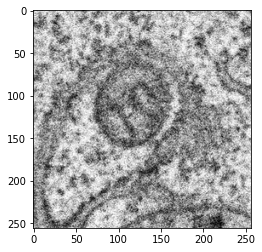

In [12]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(stack[15], cmap="gray")

<IPython.core.display.Math object>

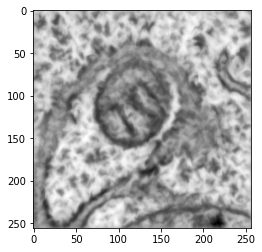

In [13]:
display(Math("\mathtt{Filtered~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(filtered_stack[15], cmap="gray")

<IPython.core.display.Math object>

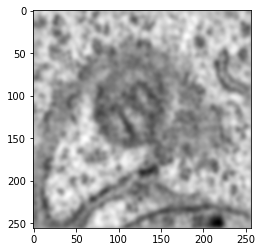

In [14]:
display(Math("\mathtt{Filtered~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_filtered_stack[15], cmap="gray")

## Download a (larger) stack

In [15]:
FILEID = "1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
FILENAME = "larger_stack.mrc"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={FILEID}" -O {FILENAME} && rm -rf /tmp/cookies.txt
#!mv /tmp/stack.mrc .

--2022-12-08 05:47:21--  https://docs.google.com/uc?export=download&confirm=t&id=1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving docs.google.com (docs.google.com)... 2a00:1450:4003:811::200e, 142.250.201.78
Connecting to docs.google.com (docs.google.com)|2a00:1450:4003:811::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utka0qo0pipe8c0phut2924t903uli29/1670474775000/01084993768099894447/*/1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_?e=download&uuid=6fabe3dc-95a0-49e2-af4c-b5708017c7d0 [following]
--2022-12-08 05:47:21--  https://doc-08-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utka0qo0pipe8c0phut2924t903uli29/1670474775000/01084993768099894447/*/1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_?e=download&uuid=6fabe3dc-95a0-49e2-af4c-b5708017c7d0
Resolving doc-08-8s-docs.googleusercontent.com 

In [16]:
stack_MRC = mrcfile.open("larger_stack.mrc")
stack = stack_MRC.data
print("(Z_size, Y_size, X_size) =", stack.shape)

(Z_size, Y_size, X_size) = (100, 1024, 1024)


## Filtering (using MRC output)

In [17]:
!python ../flowdenoising.py --input larger_stack.mrc --output filtered_larger_stack.mrc

## Filtering (without OF compensation)

In [18]:
!python ../flowdenoising.py --no_OF --input larger_stack.mrc --output no_OF_filtered_larger_stack.mrc

## The effect

In [19]:
filtered_stack_MRC = mrcfile.open("filtered_larger_stack.mrc")
filtered_stack = filtered_stack_MRC.data
no_OF_filtered_stack_MRC = mrcfile.open("no_OF_filtered_larger_stack.mrc")
no_OF_filtered_stack = no_OF_filtered_stack_MRC.data

<IPython.core.display.Math object>

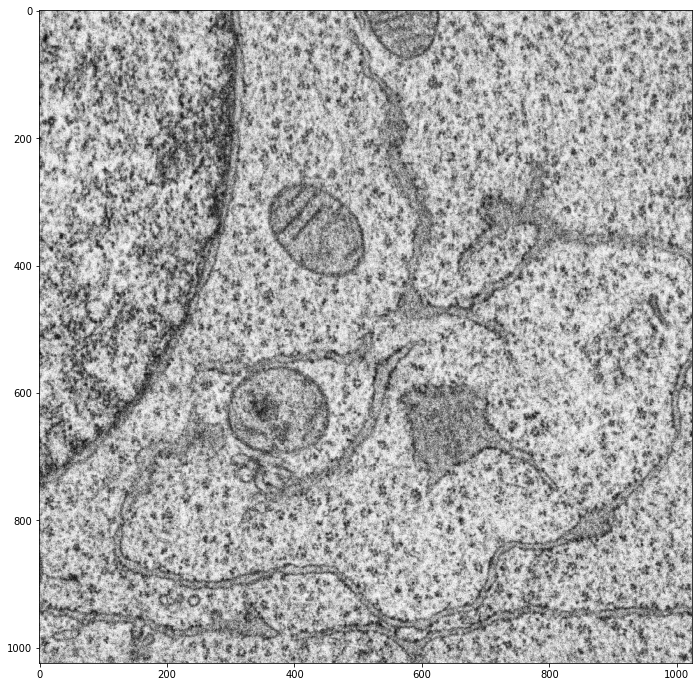

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(stack[stack.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

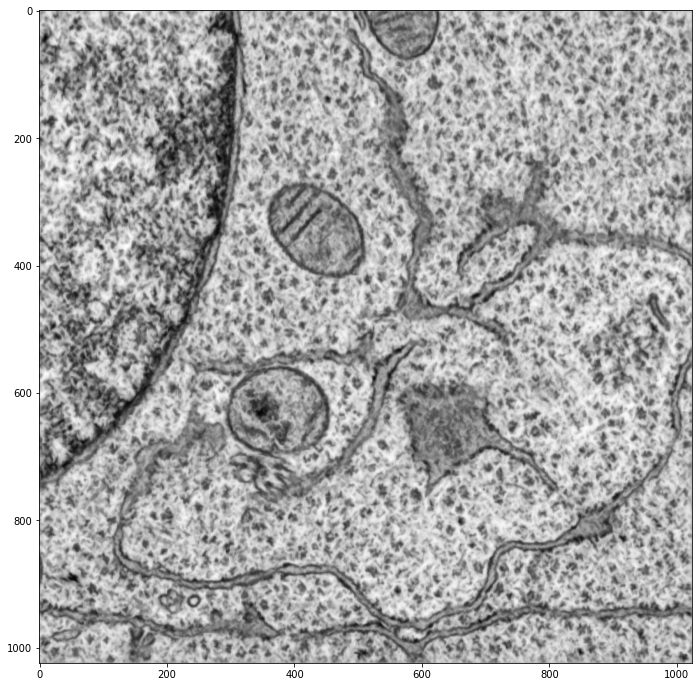

In [21]:
display(Math("\mathtt{Filtered~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(filtered_stack[stack.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

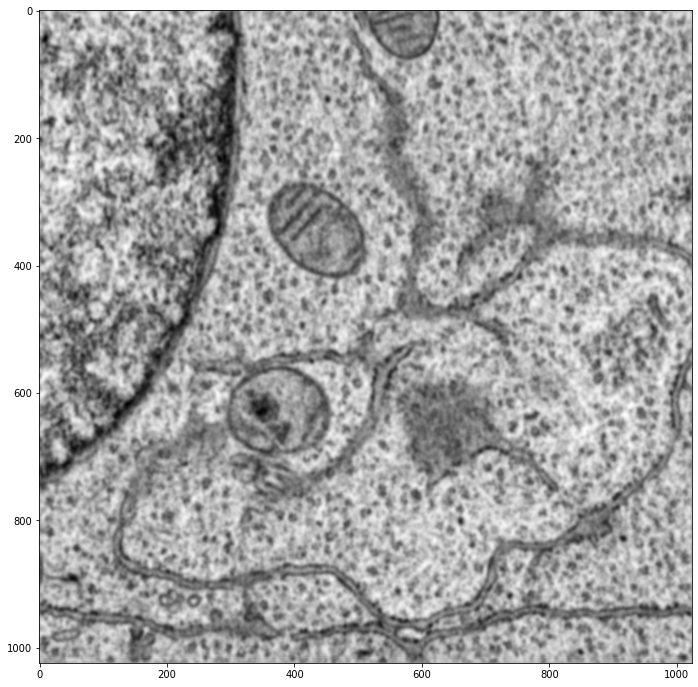

In [22]:
display(Math("\mathtt{Filtered~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_filtered_stack[stack.shape[0]//2], cmap="gray")